In [1]:
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("data/Boston.csv")
df.head()

,CRIM,ZN,INDUS,CHAS,NX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [3]:
# Check Null values
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NX         0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

array([[<Axes: title={'center': 'CRIM'}>, <Axes: title={'center': 'ZN'}>,
        <Axes: title={'center': 'INDUS'}>,
        <Axes: title={'center': 'CHAS'}>],
       [<Axes: title={'center': 'NX'}>, <Axes: title={'center': 'RM'}>,
        <Axes: title={'center': 'AGE'}>, <Axes: title={'center': 'DIS'}>],
       [<Axes: title={'center': 'RAD'}>, <Axes: title={'center': 'TAX'}>,
        <Axes: title={'center': 'PTRATIO'}>,
        <Axes: title={'center': 'B'}>],
       [<Axes: title={'center': 'LSTAT'}>,
        <Axes: title={'center': 'MEDV'}>, <Axes: >, <Axes: >]],
      dtype=object)

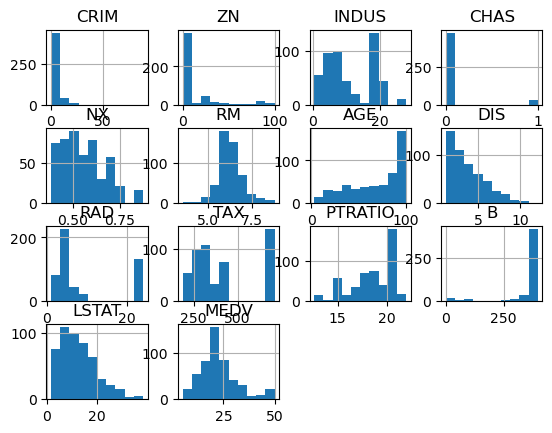

In [4]:
df.hist()

In [5]:
X=df.drop(columns=['MEDV'])
y=df['MEDV']

In [6]:
# train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [7]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [8]:
from sklearn.linear_model import LinearRegression
# cross validation
from sklearn.model_selection import cross_val_score
regression= LinearRegression()
regression.fit(X_train, y_train)
mse = cross_val_score(regression, X_train, y_train, scoring='neg_mean_squared_error', cv=5)

In [9]:
np.mean(mse)

-25.977777430926302

In [10]:
# prediction test data
reg_pred = regression.predict(X_test)
reg_pred

array([30.77834822, 38.66581541, 16.96705276, 26.79035818, 20.36068008,
       24.89386356, 18.98948959, 15.44554414, 24.50205701, 22.12455513,
       27.16709892, 20.60218969, -4.91312377, 23.45520373, 20.44300739,
       27.97454642, 21.82481134,  6.80793603, 43.13876668, 19.08804672,
       28.93737925, 31.91943808, 12.05148619, 25.41493356, 19.60614164,
       17.23543021, 24.61263361, 16.907528  , 24.25623469, 20.73183868,
       23.98650325, 26.66317526, 27.45468242, 19.57475267, 18.15660164,
       19.94422395, 33.04896681, 21.26475982, 25.83570427, 26.36436267,
       15.22545112, 33.61610719, 45.24385042, 18.83620774, 28.91584593,
       18.49470905, 14.91054896, 27.65199578, 21.75498681, 32.36964545,
       23.36168054, 36.5955736 , 16.82098601, 27.59874838, 42.39261672,
       24.39945725, 20.42785358, 34.46608842, 26.52068304, 14.0304141 ,
       24.03170468, 32.40960974, 33.59067192, 17.33583061, 22.46180876,
       18.28308242, 22.01801285, 27.57486429, 32.54366102, 13.95

In [11]:
from sklearn.metrics import mean_absolute_percentage_error
error=mean_absolute_percentage_error(reg_pred,y_test)
error

0.2608701939877697

In [12]:
accuracy = 1-error
accuracy

0.7391298060122302

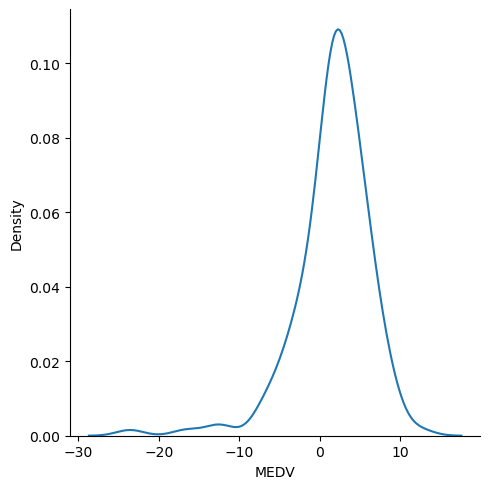

In [13]:
import seaborn as sns
sns.displot(reg_pred-y_test, kind='kde')

In [14]:
from sklearn.metrics import r2_score
score = r2_score(reg_pred, y_test)
score

0.6455498891708304

In [15]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

In [16]:
ridge_regressor =Ridge()
ridge_regressor

Ridge()

In [17]:
parameters =  {'alpha':[1,2,5,10, 20, 30, 40, 50, 60, 70, 80, 90]}
ridgecv = GridSearchCV(ridge_regressor, parameters, scoring='neg_mean_squared_error', cv=5)
ridgecv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1, 2, 5, 10, 20, 30, 40, 50, 60, 70, 80,
                                   90]},
             scoring='neg_mean_squared_error')

In [19]:
print(ridgecv.best_params_)

{'alpha': 10}


In [21]:
print(ridgecv.best_score_)

-25.80722882229147


In [23]:
ridge_pred = ridgecv.predict(X_test)

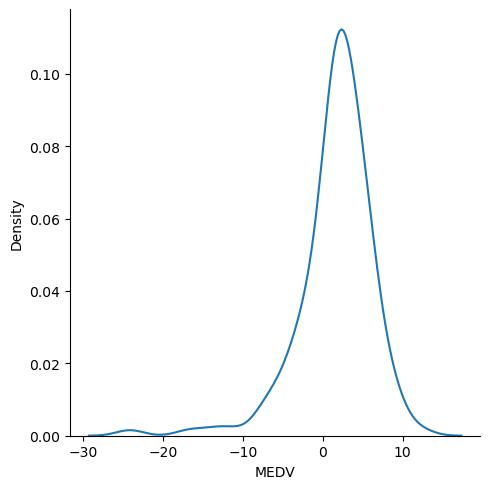

In [24]:
sns.displot(ridge_pred-y_test, kind='kde')

In [25]:
score = r2_score(reg_pred, y_test)
score

0.6455498891708304

In [27]:
# lasso Regression
from sklearn.linear_model import Lasso
lasso = Lasso()

In [29]:
parameters =  {'alpha':[1,2,5,10, 20, 30, 40, 50, 60, 70, 80, 90]}
lassocv = GridSearchCV(lasso, parameters, scoring='neg_mean_squared_error', cv=5)
lassocv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1, 2, 5, 10, 20, 30, 40, 50, 60, 70, 80,
                                   90]},
             scoring='neg_mean_squared_error')

In [30]:
print(lassocv.best_params_)
print(lassocv.best_score_)

{'alpha': 1}
-31.153603752119004


In [31]:
lasso_pred = lassocv.predict(X_test)

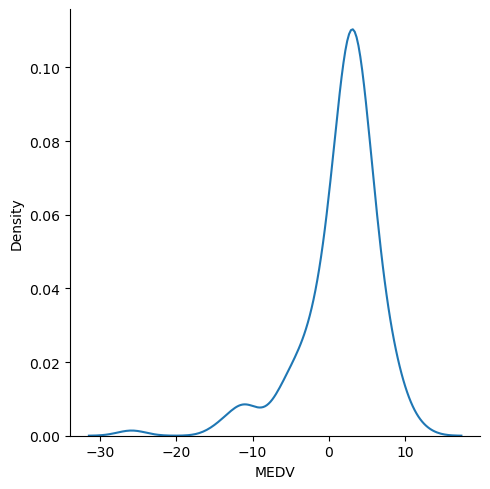

In [32]:
sns.displot(lasso_pred-y_test, kind='kde')